# LangGraph Practice

Welcome to LangGraph practice notebook. This is where i'll build and test graphs.

In [27]:
! pip install dotenv


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import os
from dotenv import load_dotenv
# Load environment variables
load_dotenv()

print("Environment loaded.")

Environment loaded.


Importing Required Pacakages


In [29]:
! pip install langchain
! pip install langgraph 
! pip istall langchain_core
! pip install langchain_google_generativeai
! pip install mypy-ipython



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: unknown command "istall" - maybe you meant "install"

ERROR: Could not find a version that satisfies the requirement langchain_google_generativeai (from versions: none)
ERROR: No matching distribution found for langchain_google_generativeai

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import langgraph.graph

# List all components of the langgraph.graph module
print(dir(langgraph.graph))

['END', 'MessageGraph', 'MessagesState', 'START', 'StateGraph', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_branch', '_node', 'add_messages', 'message', 'state']


In [31]:
%load_ext mypy_ipython


The mypy_ipython extension is already loaded. To reload it, use:
  %reload_ext mypy_ipython


In [32]:
from langgraph.graph import START, END, StateGraph
from typing_extensions import TypedDict 
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.runnables import Runnable
from _collections_abc import Sequence
from typing_extensions import TypedDict
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage
from typing import Literal


Define State

In [33]:
class State(TypedDict):
    messages: Sequence[BaseMessage]
state=State(messages=[HumanMessage(content="who are linkedin top 5 creators?")])
state["messages"][0].pretty_print()

================================ Human Message =================================

who are linkedin top 5 creators?


Define Node

In [34]:
chat = ChatGoogleGenerativeAI(model="gemini-flash-latest", temperature=0, seed  =365, max_tokens=100)


In [35]:
def ask_question(state:State)->State:
    print("entered ask_question")
    user_input=input("what is your question?")
    return State(messages=[HumanMessage(content=user_input)])


In [36]:
ask_question(State(messages=[]))

entered ask_question


{'messages': [HumanMessage(content='Give me 5 names of top linkedin voices ', additional_kwargs={}, response_metadata={})]}

In [37]:
def chatbot(state: State) -> State:
    print("entered chatbot node")
    response = chat.invoke(state["messages"])
    response.pretty_print()
    return State(messages=response)

In [38]:
def ask_another_question(state:State)->State:
    print("entered ask_another_question")
    user_input=input("do you wanna ask another question? (yes/no)")
    return State(messages=[HumanMessage(content=user_input)])

test_state2=State(messages=[])
ask_another_question(test_state2)

entered ask_another_question


{'messages': [HumanMessage(content='yes', additional_kwargs={}, response_metadata={})]}

Define routing function

In [39]:
def route(state:State)->Literal["ask_question", "__end__"]:
    
    if state["messages"][0].content == "yes":
        return "ask_question"
    else:
        return "__end__"

Define the graph 

In [40]:
graph = StateGraph(State)

In [41]:
graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)

graph.add_edge(START, "ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")
graph.add_conditional_edges(source = "ask_another_question", 
                            path = route)

In [42]:
graph_compiled = graph.compile()

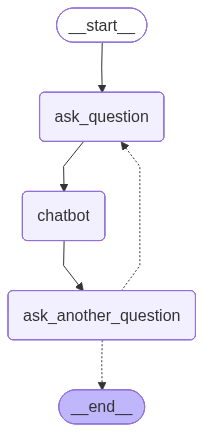

In [43]:
graph_compiled

Testing the graph

In [45]:
graph_compiled.invoke(State(messages = []))

entered ask_question
entered chatbot node
================================== Ai Message ==================================

LinkedIn is a **social networking platform** primarily focused on **professional networking and career development.**

Think of it as the "professional" version of Facebook.

Here's a breakdown of what LinkedIn is, what it's used for, and its key features:

---

## What LinkedIn Is

1.  **Professional Social Network:** It connects individuals based on their careers, industries, and professional interests.
2.  **Digital Resume/CV:** Your profile serves as a comprehensive
entered ask_another_question
entered ask_question
entered chatbot node
================================== Ai Message ==================================

The current CEO of **LinkedIn** is **Ryan Roslansky**.
entered ask_another_question


{'messages': [HumanMessage(content='yes ', additional_kwargs={}, response_metadata={})]}